In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('data/traintest_essentialpreprocessed_copy_headers.txt')

In [3]:
df1.drop(columns=['Count', 'a'])

,funny,sentence
0,0,so has the united states finally gained the up...
1,1,why cant you make fun of chinese people becaus...
2,1,the mexican word of the day is wheelchair for ...
3,1,you know you are a bad driver when siri tells ...
4,0,singapore nov as chief executive of bhp billit...
...,...,...
405395,0,about visant
405396,0,it is a technology step forward in terms of th...
405397,0,got any of your own
405398,1,the neighbor is wife is gonna be so happy when...


In [4]:
df1.profile_report()

In [31]:
#funtion to get 'top N' or 'bottom N' words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english')
    bag_of_words = vec.fit_transform(corpus.values.astype('U'))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [23]:
#10 most common and 10 most rare words
df2 = pd.read_csv('data/traintest_lemmatized_headers.txt')
only_funny = df2[df2['Funny'].isin(['1'])]
only_notfunny = df2[df2['Funny'].isin(['0'])]
display(only_funny.head())
display(only_notfunny.head())
funny_common_words = get_n_words(only_funny['sentence'], "top", 15)
notfunny_common_words = get_n_words(only_notfunny['sentence'], "top", 15)

,Funny,sentence
1,1,cant make fun chinese people wong
2,1,mexican word day wheelchair example hey mang s...
3,1,know bad driver siri tell foot stop let
9,1,go zoo yesterday one dog shih tzu
11,1,difference make nasa nsa astronomical


,Funny,sentence
0,0,united state finally gain upper hand drug lord
4,0,singapore nov chief executive bhp billiton cha...
5,0,let posterity destroyed next generation let na...
6,0,walter alone spent million neiman marcus accor...
7,0,also serve site manager finance implementation...


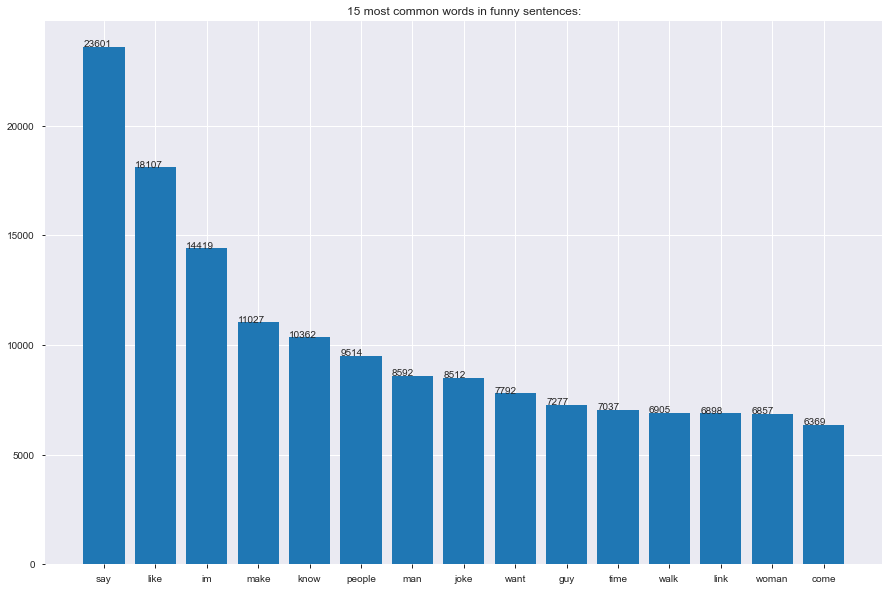

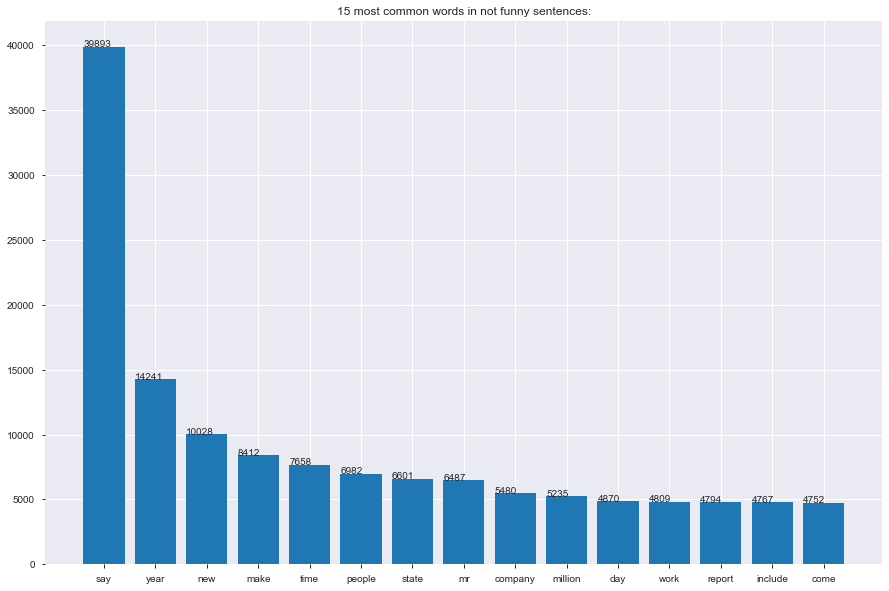

In [25]:
funny_common_words = dict(funny_common_words)
names = list(funny_common_words.keys())
values = list(funny_common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(funny_common_words)),values,tick_label=names)
plt.title('15 most common words in funny sentences:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

notfunny_common_words = dict(notfunny_common_words)
names = list(notfunny_common_words.keys())
values = list(notfunny_common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(notfunny_common_words)),values,tick_label=names)
plt.title('15 most common words in not funny sentences:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

In [28]:
# BOW-TF Embedding

no_features = 1500
tf_vectorizer = CountVectorizer(min_df=5, max_df=.8, max_features=no_features, stop_words = 'english') #, ngram_range=[1, 3]

tpl_tf = tf_vectorizer.fit_transform(df2['sentence'].astype('U'))
#display("Bow-TF :", tpl_tf.shape)
df_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names())
display(df_tf.head())

,ability,able,access,accident,accidentally,accord,account,accuse,act,action,...,yeah,year,yell,yes,yesterday,yo,york,young,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
#Preparing processed and BoW-TF embedded data for Classification
df_tf_m = pd.concat([df2, df_tf], axis = 1)
print(df_tf_m.shape)
display(df_tf_m.head())
display(df_tf_m.tail())

(405400, 1502)


,Funny,sentence,ability,able,access,accident,accidentally,accord,account,accuse,...,yeah,year,yell,yes,yesterday,yo,york,young,zone,zoo
0,0,united state finally gain upper hand drug lord,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,cant make fun chinese people wong,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,mexican word day wheelchair example hey mang s...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,know bad driver siri tell foot stop let,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,singapore nov chief executive bhp billiton cha...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


,Funny,sentence,ability,able,access,accident,accidentally,accord,account,accuse,...,yeah,year,yell,yes,yesterday,yo,york,young,zone,zoo
405395,0,visant,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405396,0,technology step forward term brain satellite b...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405397,0,get,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405398,1,neighbor wife gon na happy see much yardwork g...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405399,0,kick competition call select college senior gr...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# BoW-TF:IDF Embedding
no_features = 1500
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=.8, max_features=no_features, stop_words = 'english')

%time tpl_tfidf = tfidf_vectorizer.fit_transform(df2['sentence'].astype('U'))
display("Bow-TF:IDF :", tpl_tfidf.shape)
df_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=df2.index)
display(df_tfidf.head())

CPU times: user 5.8 s, sys: 348 ms, total: 6.15 s
Wall time: 6.36 s


'Bow-TF:IDF :'

(405400, 1500)

,ability,able,access,accident,accidentally,accord,account,accuse,act,action,...,yeah,year,yell,yes,yesterday,yo,york,young,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
df_tfidf_m = pd.concat([df2, df_tfidf], axis = 1)
print(df_tfidf_m.shape)
display(df_tfidf_m.head())
display(df_tfidf_m.tail())

(405400, 1502)


,Funny,sentence,ability,able,access,accident,accidentally,accord,account,accuse,...,yeah,year,yell,yes,yesterday,yo,york,young,zone,zoo
0,0,united state finally gain upper hand drug lord,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,cant make fun chinese people wong,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,mexican word day wheelchair example hey mang s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,know bad driver siri tell foot stop let,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,singapore nov chief executive bhp billiton cha...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.2147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Funny,sentence,ability,able,access,accident,accidentally,accord,account,accuse,...,yeah,year,yell,yes,yesterday,yo,york,young,zone,zoo
405395,0,visant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405396,0,technology step forward term brain satellite b...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405397,0,get,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405398,1,neighbor wife gon na happy see much yardwork g...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405399,0,kick competition call select college senior gr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df = pd.read_csv('data/traintest_essentialpreprocessed_copy_headers.txt')

In [38]:
from pycaret.nlp import *
from nltk.corpus import stopwords

In [39]:
%time su_1 = setup(data = df1, target = 'sentence', custom_stopwords=stopwords.words('english'), session_id=21) 

Description,Value
session_id,21
# Documents,405400
Vocab Size,64844
Custom Stopwords,True


CPU times: user 22min 40s, sys: 19.8 s, total: 23min
Wall time: 40min 5s


In [40]:
%time m1 = create_model(model='lda', multi_core=True)

CPU times: user 56min 5s, sys: 12min 44s, total: 1h 8min 49s
Wall time: 1h 34min 51s


In [41]:
%time lda_data = assign_model(m1) 

CPU times: user 6min 20s, sys: 25.1 s, total: 6min 45s
Wall time: 7min 10s


In [42]:
lda_data.head()

,Count,funny,a,sentence,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,0,0,a,finally gain upper hand drug lord,0.037326,0.603468,0.226868,0.132339,Topic 1,0.60
1,1,1,a,make fun chinese people,0.050943,0.402189,0.495889,0.050979,Topic 2,0.50
2,2,1,a,mexican wheelchair example see today wheelchai...,0.167839,0.034257,0.031259,0.766646,Topic 3,0.77
3,3,1,a,know bad driver tell foot stop let,0.531232,0.406264,0.031252,0.031252,Topic 0,0.53
4,4,0,a,charle goodyear fond show investor journalist ...,0.094241,0.128814,0.180677,0.596268,Topic 3,0.60


In [43]:
evaluate_model(m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [80]:
# BOW-TF Embedding

df2 = pd.read_csv('temp.txt')

tf_vectorizer = CountVectorizer() #, ngram_range=[1, 3]

tpl_tf = tf_vectorizer.fit_transform(df2['sentence'].astype('U'))
#display("Bow-TF :", tpl_tf.shape)
df_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names())
display(df_tf.head())

,art,best,but,do,football,is,knock,like,not,r2d2,soccer,sport,the,there,who
0,2,0,0,0,0,1,2,0,0,1,0,0,0,1,2
1,0,1,1,0,1,1,0,1,0,0,1,0,1,0,0
2,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0
3,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0


In [81]:
#Preparing processed and BoW-TF embedded data for Classification
df_tf_m = pd.concat([df2, df_tf], axis = 1)
print(df_tf_m.shape)
display(df_tf_m.head())

(4, 17)


,funny,sentence,art,best,but,do,football,is,knock,like,not,r2d2,soccer,sport,the,there,who
0,1,knock knock who is there art art who r2d2,2,0,0,0,0,1,2,0,0,1,0,0,0,1,2
1,0,i like football but soccer is the best,0,1,1,0,1,1,0,1,0,0,1,0,1,0,0
2,0,football is the best sport,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0
3,0,i do not like art,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0


In [76]:
# BoW-TF:IDF Embedding
tfidf_vectorizer = TfidfVectorizer()

%time tpl_tfidf = tfidf_vectorizer.fit_transform(df2['sentence'].astype('U'))
display("Bow-TF:IDF :", tpl_tfidf.shape)
df_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=df2.index)
display(df_tfidf.head())

CPU times: user 2.36 ms, sys: 339 µs, total: 2.7 ms
Wall time: 2.5 ms


'Bow-TF:IDF :'

(4, 15)

,art,best,but,do,football,is,knock,like,not,r2d2,soccer,sport,the,there,who
0,0.439130,0.000000,0.000000,0.000000,0.000000,0.177757,0.55698,0.000000,0.000000,0.27849,0.000000,0.000000,0.000000,0.27849,0.55698
1,0.000000,0.356394,0.452041,0.000000,0.356394,0.288532,0.00000,0.356394,0.000000,0.00000,0.452041,0.000000,0.356394,0.00000,0.00000
2,0.000000,0.435847,0.000000,0.000000,0.435847,0.352855,0.00000,0.000000,0.000000,0.00000,0.000000,0.552816,0.435847,0.00000,0.00000
3,0.437791,0.000000,0.000000,0.555283,0.000000,0.000000,0.00000,0.437791,0.555283,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000


In [77]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
df_tfidf_m = pd.concat([df2, df_tfidf], axis = 1)
print(df_tfidf_m.shape)
display(df_tfidf_m.head())

(4, 17)


,funny,sentence,art,best,but,do,football,is,knock,like,not,r2d2,soccer,sport,the,there,who
0,1,knock knock who is there art art who r2d2,0.439130,0.000000,0.000000,0.000000,0.000000,0.177757,0.55698,0.000000,0.000000,0.27849,0.000000,0.000000,0.000000,0.27849,0.55698
1,0,i like football but soccer is the best,0.000000,0.356394,0.452041,0.000000,0.356394,0.288532,0.00000,0.356394,0.000000,0.00000,0.452041,0.000000,0.356394,0.00000,0.00000
2,0,football is the best sport,0.000000,0.435847,0.000000,0.000000,0.435847,0.352855,0.00000,0.000000,0.000000,0.00000,0.000000,0.552816,0.435847,0.00000,0.00000
3,0,i do not like art,0.437791,0.000000,0.000000,0.555283,0.000000,0.000000,0.00000,0.437791,0.555283,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
